In [30]:
import torch
import pytorch3d
from pytorch3d.loss import chamfer_distance
import numpy as np
import matplotlib.pyplot as plt

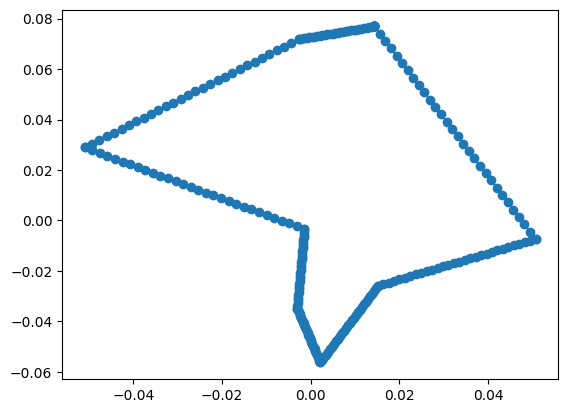

In [431]:
vertices = torch.tensor(np.load('Tandem2D/vertices/6.npy')).float()
n_vertices, vertex_dim = vertices.shape
upsample = True
# upsample
if upsample:
    upsample_num = 30
    upsampled_edges = []
    for i in range(n_vertices):
        next_i = (i+1)%n_vertices
        alpha = torch.linspace(0, 1, upsample_num)
        interpolated_points = vertices[i] + alpha[:,None]*(vertices[next_i]-vertices[i])
        upsampled_edges.append(interpolated_points)
    upsampled_vertices = torch.cat(upsampled_edges, dim=0)
else:
    upsample_num = 1
    upsampled_vertices = vertices
plt.scatter(upsampled_vertices[:,0], upsampled_vertices[:,1])
plt.plot(upsampled_vertices[:,0], upsampled_vertices[:,1])

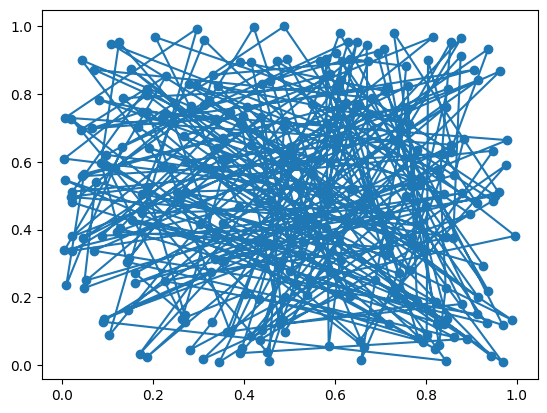

In [432]:
vertices_pred = torch.tensor(np.random.rand(n_vertices * upsample_num, vertex_dim), requires_grad=True, dtype=torch.float32)
plt.scatter(vertices_pred[:,0].detach().numpy(), vertices_pred[:,1].detach().numpy())
plt.plot(vertices_pred[:,0].detach().numpy(), vertices_pred[:,1].detach().numpy())

In [461]:
# import adam
updated_vertices_pred = vertices_pred.clone().detach().requires_grad_(True)
optim = torch.optim.Adam([updated_vertices_pred], lr=0.01)

edge_loss_weight = 1e-3
# gradient descent
for i in range(1000):
    loss, _ = chamfer_distance(upsampled_vertices.unsqueeze(0), updated_vertices_pred.unsqueeze(0))
    vertex_offset = torch.cat([updated_vertices_pred[1:], updated_vertices_pred[:1]])
    edge_loss = torch.linalg.norm(updated_vertices_pred - vertex_offset, dim=1).sum()
    loss += edge_loss_weight * edge_loss
    if i % 10 == 0:
        print(loss)
    optim.zero_grad()
    loss.backward()
    optim.step()


True
tensor(0.7400, grad_fn=<AddBackward0>)
tensor(0.5430, grad_fn=<AddBackward0>)
tensor(0.4011, grad_fn=<AddBackward0>)
tensor(0.2897, grad_fn=<AddBackward0>)
tensor(0.2044, grad_fn=<AddBackward0>)
tensor(0.1408, grad_fn=<AddBackward0>)
tensor(0.0938, grad_fn=<AddBackward0>)
tensor(0.0603, grad_fn=<AddBackward0>)
tensor(0.0370, grad_fn=<AddBackward0>)
tensor(0.0213, grad_fn=<AddBackward0>)
tensor(0.0112, grad_fn=<AddBackward0>)
tensor(0.0056, grad_fn=<AddBackward0>)
tensor(0.0028, grad_fn=<AddBackward0>)
tensor(0.0017, grad_fn=<AddBackward0>)
tensor(0.0012, grad_fn=<AddBackward0>)
tensor(0.0010, grad_fn=<AddBackward0>)
tensor(0.0009, grad_fn=<AddBackward0>)
tensor(0.0008, grad_fn=<AddBackward0>)
tensor(0.0008, grad_fn=<AddBackward0>)
tensor(0.0008, grad_fn=<AddBackward0>)
tensor(0.0008, grad_fn=<AddBackward0>)
tensor(0.0008, grad_fn=<AddBackward0>)
tensor(0.0008, grad_fn=<AddBackward0>)
tensor(0.0008, grad_fn=<AddBackward0>)
tensor(0.0008, grad_fn=<AddBackward0>)
tensor(0.0008, grad_

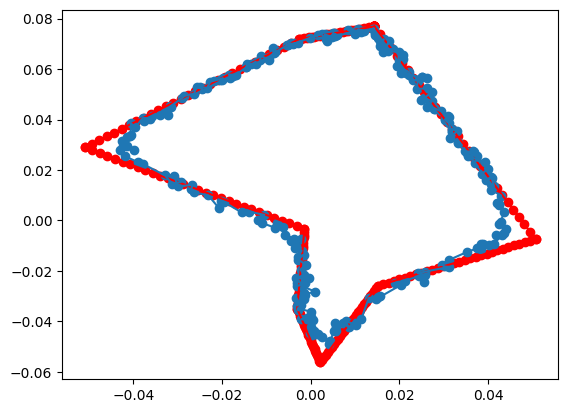

In [462]:
plt.scatter(upsampled_vertices[:,0], upsampled_vertices[:,1], color='r')
plt.plot(upsampled_vertices[:,0], upsampled_vertices[:,1], color='r')
plt.scatter(updated_vertices_pred[:,0].detach().numpy(), updated_vertices_pred[:,1].detach().numpy())
plt.plot(updated_vertices_pred[:,0].detach().numpy(), updated_vertices_pred[:,1].detach().numpy())
